In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import re # for creating numwords column
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import time
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
num_var = ['UNION',
 'RECON_STATUS',
 'LEVEL',
 'VIRTUAL',
 'BIES',
 'TOTAL',
 'STITLEI',
 'SHARED_TIME',
 'MAGNET_TEXT',
 'RECONSTF10',
 'RECONSTF11',
 'RECONSTF12',
 'RECONSTF13',
 'RECON_STATUS15',
 'RECON_STATUS16',
 'PVI2017',
 'PVI2014',
 'ALL_MTH00NUMVALID_1415',
 'ALL_RLA00NUMVALID_1415',
 'ALL_RLA00NUMVALID_1516',
 'ALL_RLA00PCTPROF_1516',
 'ALL_MTH00NUMVALID_1516',
 'ALL_MTH00PCTPROF_1516',
 'SD_lv_PVI_2014',
 'SD_lv_PVI_2017',
 'Area (Land)',
 'Area (Water)',
 'Total Population',
 'Population Density (Per Sq. Mile)',
 '% Total Population: Under 18 Years',
 '% Total Population: 18 to 34 Years',
 '% Total Population: 35 to 64 Years',
 '% Total Population: 65 and Over',
 '% Total Population: White Alone',
 '% Total Population: Black or African American Alone',
 '% Total Population: American Indian and Alaska Native Alone',
 '% Total Population: Asian Alone',
 '% Total Population: Native Hawaiian and Other Pacific Islander Alone',
 '% Total Population: Some Other Race Alone',
 '% Total Population: Two or More Races',
 'Occupied Housing Units',
 '% Occupied Housing Units: Family Households',
 '% Occupied Housing Units: Family Households: Married-Couple Family',
 '% Occupied Housing Units: Nonfamily Households',
 '% Occupied Housing Units: Nonfamily Households: Householder Living Alone',
 '% Occupied Housing Units: With Related Children of the Householder Under 18',
 '% Occupied Housing Units: No Related Children of the Householder Under 18',
 'Population 15 Years and Over:',
 '% Population 15 Years and Over: Never Married',
 '% Population 15 Years and Over: Now Married (Not Including Separated)',
 '% Population 15 Years and Over: Separated',
 '% Population 15 Years and Over: Widowed',
 '% Population 15 Years and Over: Divorced',
 'Population 25 Years and Over:',
 '% Population 25 Years and Over: Less than High School',
 '% Population 25 Years and Over: High School Graduate (Includes Equivalency)',
 '% Population 25 Years and Over: Some College',
 "% Population 25 Years and Over: Bachelor's Degree",
 "% Population 25 Years and Over: Master's Degree",
 '% Population 25 Years and Over: Professional School Degree',
 '% Population 25 Years and Over: Doctorate Degree',
 'Population 3 Years and Over:',
 '% Population 3 Years and Over: Enrolled in School',
 '% Population 3 Years and Over: Not Enrolled in School',
 '% Population 3 Years and Over Enrolled in School: Public School',
 '% Population 3 Years and Over Enrolled in School: Public School: Pre-School',
 '% Population 3 Years and Over Enrolled in School: Public School: K-8',
 '% Population 3 Years and Over Enrolled in School: Public School: 9-12',
 '% Population 3 Years and Over Enrolled in School: Public School: College',
 '% Population 3 Years and Over Enrolled in School: Private School',
 '% Population 3 Years and Over Enrolled in School: Private School: Pre-School',
 '% Population 3 Years and Over Enrolled in School: Private School: K-8',
 '% Population 3 Years and Over Enrolled in School: Private School: 9-12',
 '% Population 3 Years and Over Enrolled in School: Private School: College',
 'Civilian Population 16 to 19 Years:',
 '% Civilian Population 16 to 19 Years: Not High School Graduate, Not Enrolled (Dropped Out)',
 '% Civilian Population 16 to 19 Years: High School Graduate, or Enrolled (in School)',
 '% Civilian Population in Labor Force 16 Years and Over: Employed',
 '% Civilian Population in Labor Force 16 Years and Over: Unemployed',
 '% White Alone, Not Hispanic or Latino 16 Years Old  in&nbsp; Civilian Labor Force: Employed',
 '% White Alone, Not Hispanic or Latino 16 Years Old  in&nbsp; Civilian Labor Force: Unemployed',
 '% Employed Civilian Population 16 Years and Over: Agriculture, Forestry, Fishing and Hunting, and Mining',
 '% Employed Civilian Population 16 Years and Over: Construction',
 '% Employed Civilian Population 16 Years and Over: Manufacturing',
 '% Employed Civilian Population 16 Years and Over: Wholesale Trade',
 '% Employed Civilian Population 16 Years and Over: Retail Trade',
 '% Employed Civilian Population 16 Years and Over: Transportation and Warehousing, and Utilities',
 '% Employed Civilian Population 16 Years and Over: Information',
 '% Employed Civilian Population 16 Years and Over: Finance and Insurance, and Real Estate and Rental  and Leasing',
 '% Employed Civilian Population 16 Years and Over: Professional, Scientific, and Management, and  Administrative and Waste Management Services',
 '% Employed Civilian Population 16 Years and Over: Educational Services, and Health Care and Social  Assistance',
 '% Employed Civilian Population 16 Years and Over: Arts, Entertainment, and Recreation, and  Accommodation and Food Services',
 '% Employed Civilian Population 16 Years and Over: Other Services, Except Public Administration',
 '% Employed Civilian Population 16 Years and Over: Public Administration',
 '% Employed Civilian Population 16 Years and Over: Unpaid Family Workers',
 'Median Household Income (In 2016 Inflation Adjusted Dollars)',
 'Median Household Income (In 2016 Inflation Adjusted Dollars): White Alone Householder',
 'Median Household Income (In 2016 Inflation Adjusted Dollars): Black or African American Alone Householder',
 'Median Household Income (In 2016 Inflation Adjusted Dollars): American Indian and Alaska Native Alone  Householder',
 'Median Household Income (In 2016 Inflation Adjusted Dollars): Asian Alone',
 'Median Household Income (In 2016 Inflation Adjusted Dollars): Native Hawaiian and Other Pacific Islander Alone  Householder',
 'Median Household Income (In 2016 Inflation Adjusted Dollars): Some Other Race Alone Householder',
 'Median Household Income (In 2016 Inflation Adjusted Dollars): Two or More Races Householder',
 'Median Household Income (In 2016 Inflation Adjusted Dollars): Hispanic or Latino Householder',
 'Median Household Income (In 2016 Inflation Adjusted Dollars): White Alone Householder, Not Hispanic or Latino',
 'Per Capita Income (In 2016 Inflation Adjusted Dollars)',
 'Gini Index',
 'Median Year Structure Built',
 'Median Value',
 '% Renter-Occupied Housing Units: Less than 10 Percent',
 '% Renter-Occupied Housing Units: 10 to 29 Percent',
 '% Renter-Occupied Housing Units: 30 to 49 Percent',
 '% Renter-Occupied Housing Units: 50 Percent or More',
 '% Renter-Occupied Housing Units: Not Computed',
 '% Families: Income in Below Poverty Level',
 '% Families: Income in at or Above Poverty Level',
 'Population Under 18 Years of Age for Whom Poverty Status Is Determined:',
 '% Population Under 18 Years of Age for Whom Poverty Status Is Determined: Living in Poverty',
 '% Population Under 18 Years of Age for Whom Poverty Status Is Determined: at or Above Poverty Level',
 '% Total: Same House 1 Year Ago',
 '% Total: Moved Within Same County',
 '% Total: Moved From Different County Within Same State',
 '% Total: Moved From Different State',
 '% Total: Moved From Abroad',
 '% Total Population: Native Born',
 '% Total Population: Foreign Born',
 '% Total Population: Foreign Born: Naturalized Citizen',
 '% Total Population: Foreign Born: Not a Citizen',
 '% Foreign-Born Population: Europe',
 '% Foreign-Born Population: Asia',
 '% Foreign-Born Population: Africa',
 '% Foreign-Born Population: Oceania',
 '% Foreign-Born Population: Americas',
 'Total:',
 '% Total: No Health Insurance Coverage',
 '% Total: with Health Insurance Coverage',
 '% Total: with Health Insurance Coverage: Public Health Coverage',
 '% Total: with Health Insurance Coverage: Private Health Insurance',
 'close_rate12',
 'close_rate13',
 'close_rate14',
 'close_rate15',
 'close_rate16',
 'POPTOT_S16',
 'POP517_S16',
 'CHILDPOV_S16',
 'MEMBER',
 'TOTFRL',
 'TITLEI',
 'FTE',
 'YEAR_OPENED',
 'YEAR_CLOSED',
 'TOTETH',
 'PCTETH',
 'AGE',
 'PCTFRL',
 'STR',
 'PROG_COUNT',
 'RIT_COUNT',
 'ESS_COUNT',
 'ESS_STR',
 'PROG_STR',
 'RIT_STR'
 ,'NUMWORDS']

In [3]:
df_charter = pd.read_pickle('../../nowdata/traincf_2015.pkl')

In [4]:
df_train = df_charter[~(df_charter['ALL_RLA00PCTPROF_1516'].isnull() & df_charter['ALL_MTH00PCTPROF_1516'].isnull())] # removes schools that have no data for both variables

In [5]:
df_train['NUMWORDS'] = df_train['WEBTEXT'].apply(lambda x: sum([len(re.split('\W+|_', p[3])) for p in x]))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
df_train['NUMWORDS'].describe()

count    6.409000e+03
mean     2.995191e+04
std      1.464737e+05
min      0.000000e+00
25%      4.660000e+02
50%      7.061000e+03
75%      3.098500e+04
max      8.057623e+06
Name: NUMWORDS, dtype: float64

In [7]:
df_train = df_train[num_var]

In [8]:
df_train.replace('Not reported', np.nan, inplace = True)

In [9]:
df_train.replace('Yes', 1, inplace = True)
df_train.replace('No', 0, inplace = True)

In [10]:
only_numeric = df_train.select_dtypes(include=[np.number])

In [15]:
list(only_numeric) # numeric var list

['UNION',
 'RECON_STATUS',
 'BIES',
 'TOTAL',
 'RECONSTF11',
 'RECONSTF12',
 'RECONSTF13',
 'RECON_STATUS15',
 'RECON_STATUS16',
 'PVI2017',
 'PVI2014',
 'ALL_MTH00NUMVALID_1415',
 'ALL_RLA00NUMVALID_1415',
 'ALL_RLA00NUMVALID_1516',
 'ALL_MTH00NUMVALID_1516',
 'SD_lv_PVI_2014',
 'SD_lv_PVI_2017',
 'Area (Land)',
 'Area (Land)',
 'Area (Water)',
 'Total Population',
 'Population Density (Per Sq. Mile)',
 '% Total Population: Under 18 Years',
 '% Total Population: 18 to 34 Years',
 '% Total Population: 35 to 64 Years',
 '% Total Population: 65 and Over',
 '% Total Population: White Alone',
 '% Total Population: Black or African American Alone',
 '% Total Population: American Indian and Alaska Native Alone',
 '% Total Population: Asian Alone',
 '% Total Population: Native Hawaiian and Other Pacific Islander Alone',
 '% Total Population: Some Other Race Alone',
 '% Total Population: Two or More Races',
 'Occupied Housing Units',
 '% Occupied Housing Units: Family Households',
 '% Occupied

In [11]:
not_numeric_var = list(set(list(df_train)) - set(only_numeric)) # need ways of handling these categorical variables

In [12]:
not_numeric_var

['TITLEI',
 'ALL_MTH00PCTPROF_1516',
 'SHARED_TIME',
 'ALL_RLA00PCTPROF_1516',
 'RECONSTF10',
 'LEVEL',
 'MAGNET_TEXT',
 'STITLEI',
 'VIRTUAL']

In [72]:
df_train['CSA15'].iloc[0] # some are just strings of numbers

'266'

In [18]:
df_train[not_numeric_var] # what the non-numeric vars look like

,SHARED_TIME,STITLEI,ALL_RLA00PCTPROF_1516,ALL_MTH00PCTPROF_1516,RECONSTF10,VIRTUAL,MAGNET_TEXT,LEVEL,TITLEI
10178,No,Yes,LE10,11-19,2,No,No,4,No
10607,No,Yes,25-29,20-24,NaN,No,No,2,Yes
3025,No,Yes,26,32,2,No,Missing,1,Yes
2791,No,Yes,35-39,65-69,NaN,No,No,3,Yes
2506,Missing,Yes,79,72,2,Missing,No,2,Yes
4153,No,Not Applicable,54,62,2,No,No,1,No
8198,No,Yes,45-49,50-54,2,No,Missing,1,Yes
818,Missing,No,56,31,2,No,No,2,Yes
8749,Missing,Yes,43,36,2,No,No,1,Yes
9633,No,Not Applicable,70-74,60-64,NaN,No,No,1,No


In [41]:
pd.to_numeric(df_train['CSA15']) # some have 'N' value

ValueError: Unable to parse string "N" at position 5

In [33]:
df_train['CBSA'].iloc[128] # 'N' value

'N'

In [13]:
df_train.replace('N', np.nan, inplace = True)

In [14]:
df_train.replace('Missing', np.nan, inplace = True)
df_train.replace('Not Applicable', np.nan, inplace = True)

In [15]:
df_train.replace('NaN', np.nan, inplace = True)

In [16]:
# convert column to numeric if possible
str_num = []
for var in not_numeric_var:
    try:
        df_train[var] = pd.to_numeric(df_train[var])
        str_num.append(var)
    except:
        pass

In [17]:
needs_fixing = list(set(not_numeric_var)-set(str_num)) # vars that cannot convert to numeric because of some string value

In [24]:
needs_fixing

['ALL_MTH00PCTPROF_1516', 'ALL_RLA00PCTPROF_1516']

In [18]:
# used to clean proficiency variables
def proficiency_variables(col):
    new_values = []
    for r in col.values:
        if isinstance(r, str) and '-' in r:
            ra = r.split('-')
            a = int(ra[0])
            b = int(ra[1])
            new_values.append((a+b)/2)
        else:
            try:
                c = int(r)
                new_values.append(c)
            except:  
                c = np.nan
                new_values.append(c)
    return new_values

In [26]:
df_train['ALL_MTH00PCTPROF_1516'] # before

10178    11-19
10607    20-24
3025        32
2791     65-69
2506        72
4153        62
8198     50-54
818         31
8749        36
9633     60-64
9041      LT50
1984        77
9307     35-39
3270      LT50
836         29
10884       35
9342         8
2902      LE10
8853       LE5
10069       33
9908        56
10198       50
10532      LE5
8388        12
12090    50-54
8909     21-39
11617    40-44
9128     60-69
9528        47
8925        47
         ...  
2292     70-74
714         93
8736        81
2745        PS
3337     60-79
8615        67
3219        77
659         18
797         22
755         57
10200       32
8291     11-19
2496     15-19
1871        20
2046     85-89
2163       6-9
537      65-69
9893        19
2897        15
2222        33
10327    45-49
2599        96
705      35-39
3468     70-74
4373     70-74
9225     35-39
3264      GE50
9845        52
10799    50-59
2732        23
Name: ALL_MTH00PCTPROF_1516, Length: 6409, dtype: object

In [20]:
df_train['ALL_MTH00PCTPROF_1516'] = pd.Series(proficiency_variables(df_train['ALL_MTH00PCTPROF_1516']), index = df_train.index)
df_train['ALL_RLA00PCTPROF_1516'] = pd.Series(proficiency_variables(df_train['ALL_RLA00PCTPROF_1516']), index = df_train.index)

In [28]:
df_train['ALL_MTH00PCTPROF_1516'] # after

10178    15.0
10607    22.0
3025     32.0
2791     67.0
2506     72.0
4153     62.0
8198     52.0
818      31.0
8749     36.0
9633     62.0
9041      NaN
1984     77.0
9307     37.0
3270      NaN
836      29.0
10884    35.0
9342      8.0
2902      NaN
8853      NaN
10069    33.0
9908     56.0
10198    50.0
10532     NaN
8388     12.0
12090    52.0
8909     30.0
11617    42.0
9128     64.5
9528     47.0
8925     47.0
         ... 
2292     72.0
714      93.0
8736     81.0
2745      NaN
3337     69.5
8615     67.0
3219     77.0
659      18.0
797      22.0
755      57.0
10200    32.0
8291     15.0
2496     17.0
1871     20.0
2046     87.0
2163      7.5
537      67.0
9893     19.0
2897     15.0
2222     33.0
10327    47.0
2599     96.0
705      37.0
3468     72.0
4373     72.0
9225     37.0
3264      NaN
9845     52.0
10799    54.5
2732     23.0
Name: ALL_MTH00PCTPROF_1516, Length: 6409, dtype: float64

In [21]:
df_train.replace([np.inf, -np.inf], np.nan, inplace = True) # handles pctfrl variable which has inf values

In [22]:
only_numeric = df_train.select_dtypes(include=[np.number])
list(set(list(df_train)) - set(only_numeric)) # check all variables are numeric

[]

In [66]:
# one hot encoding (if needed, nont needed since we handled all categorical variables)
# not_clsed = pd.get_dummies(not_clsed, columns = needs_fixing) 

In [23]:
only_numeric_array = df_train.values

# Replaces nan with average of columns
# Thanks stackoverflow
col_mean = np.nanmean(only_numeric_array, axis=0)
inds = np.where(np.isnan(only_numeric_array))

# Place column means in the indices. Align the arrays using take
only_numeric_array[inds] = np.take(col_mean, inds[1])

In [91]:
# set(np.where(np.isnan(only_numeric_array))[1])

set()

In [96]:
# set(np.where(np.isinf(only_numeric_array))[1]) # only column 195 of only_numeric_array contains inf values

{195}

In [67]:
# np.where(np.isinf(not_clsed['PCTFRL'].values)) # 'PCTFRL' contains inf values

(array([ 337, 1550]),)

In [70]:
# not_clsed['PCTFRL'].iloc[300:350]

763     -0.001295
11223    0.180247
11801    0.603279
2131     0.105882
12048    0.418367
1811    -0.001931
2613     0.074074
9424     0.069149
57       0.333333
3671     1.049853
9612     0.968531
9035     0.718261
10285    0.665109
11119    0.678832
1794     0.962818
837      0.334135
9011     0.664706
4413     0.323671
1022     1.031873
11644    0.617647
8906     0.744428
3018     0.891219
11845    0.887640
3850     0.797508
2009     0.598025
9814     0.710112
9770     0.653488
265      0.000000
459      0.083665
12277         NaN
3998     0.933148
2142     0.878788
10986    0.333333
10777    0.726316
8719     0.141284
9269     0.211382
11856         NaN
10643         inf
8430     0.663717
3460     0.912879
9645     0.979381
9073     0.169065
9448     0.149171
280      0.000000
10106    0.675497
3887     0.154506
11710    0.674497
1958     0.413174
1271          NaN
12590    1.323887
Name: PCTFRL, dtype: float64

In [101]:
list(not_clsed)[196] # name of var with inf value

'PCTFRL'

In [24]:
scaler = StandardScaler()
clean_data = scaler.fit_transform(only_numeric_array) # normalize and center

In [35]:
clean_data.shape

(6409, 165)

In [25]:
pca = PCA()
pca.fit(clean_data)

pca.explained_variance_ratio_ # ordered from highest variance to lowest amongst all components

array([  1.45891809e-01,   1.02161479e-01,   7.35687520e-02,
         5.58115440e-02,   4.47202268e-02,   4.05266816e-02,
         3.02420170e-02,   2.52574529e-02,   2.41708483e-02,
         2.28928101e-02,   1.85718044e-02,   1.68449348e-02,
         1.59000244e-02,   1.43942492e-02,   1.39955743e-02,
         1.24699569e-02,   1.20732395e-02,   1.06742546e-02,
         1.01183046e-02,   9.75773808e-03,   9.59797811e-03,
         8.80012972e-03,   8.07957044e-03,   7.88541362e-03,
         7.56047449e-03,   7.38963859e-03,   7.21992579e-03,
         7.17323559e-03,   7.01077581e-03,   6.74198027e-03,
         6.67618400e-03,   6.46203203e-03,   6.30059364e-03,
         6.20642168e-03,   6.12415762e-03,   6.02917333e-03,
         5.93669422e-03,   5.89427075e-03,   5.81614690e-03,
         5.62298648e-03,   5.58894746e-03,   5.46431871e-03,
         5.38034579e-03,   5.19534435e-03,   4.88936639e-03,
         4.83193408e-03,   4.75139104e-03,   4.69666837e-03,
         4.46491316e-03,

In [26]:
np.where(np.cumsum(pca.explained_variance_ratio_) > .999) # 118 components are needed to explain .999 of the variance

(array([117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164]),)

In [27]:
# project data onto 118 components
pca = PCA(n_components = 118)
pca.fit(clean_data)

PCA(copy=True, iterated_power='auto', n_components=118, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
transformed_data = pca.transform(clean_data)

## Silhouette Cluster Validation

sample x

i_silh(x) = (b - a)/max(a,b)

a = avg distance between x and other points in its cluster

b = avg distance between x and then other points in the next closest cluster

In [29]:
range_n_clusters = range(2,50) # set range of possible n

In [30]:
sil_scores =  []
max_score = -2
max_n = 1

In [31]:
start = time.time()
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, random_state=10)
    cluster_labels = clusterer.fit_predict(transformed_data)
    silhouette_avg = silhouette_score(transformed_data, cluster_labels)
    print("For n_clusters =", n, "The average silhouette_score is :", silhouette_avg)
    sil_scores.append(silhouette_avg)
    if silhouette_avg > max_score:
        max_n = n
        max_score = silhouette_avg
    end = time.time()
    print('Time Elapsed:{:f}, n:{:f}'.format(end - start, n))


For n_clusters = 2 The average silhouette_score is : 0.335181189874
Time Elapsed:5.136226, n:2.000000
For n_clusters = 3 The average silhouette_score is : 0.327747813229
Time Elapsed:9.062999, n:3.000000
For n_clusters = 4 The average silhouette_score is : 0.326184503695
Time Elapsed:13.293079, n:4.000000
For n_clusters = 5 The average silhouette_score is : 0.327939244474
Time Elapsed:17.323831, n:5.000000
For n_clusters = 6 The average silhouette_score is : 0.334047335052
Time Elapsed:21.103725, n:6.000000
For n_clusters = 7 The average silhouette_score is : 0.295473099111
Time Elapsed:25.065212, n:7.000000
For n_clusters = 8 The average silhouette_score is : 0.289949436033
Time Elapsed:28.915936, n:8.000000
For n_clusters = 9 The average silhouette_score is : 0.298193196434
Time Elapsed:32.941487, n:9.000000
For n_clusters = 10 The average silhouette_score is : 0.298540573822
Time Elapsed:36.918374, n:10.000000
For n_clusters = 11 The average silhouette_score is : 0.0960560612618
Tim

### using state seed 10, 12 clusters most likely as can seen by above output and confirmed below, next highest are 2, 6, 3

In [47]:
max_n

2

In [32]:
# visualization from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py


def visualize(transformed_data, n, seed):
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 20)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(transformed_data) + (n+1)*10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n, max_iter = 600, random_state = seed)
    cluster_labels = clusterer.fit_predict(transformed_data)
    silhouette_avg = silhouette_score(transformed_data, cluster_labels)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(transformed_data, cluster_labels)

    y_lower = 10
    for i in range(n):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1,-.5,-.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n),
                 fontsize=14, fontweight='bold')

    plt.show()

SyntaxError: keyword argument repeated (<ipython-input-32-95e306b36b82>, line 18)

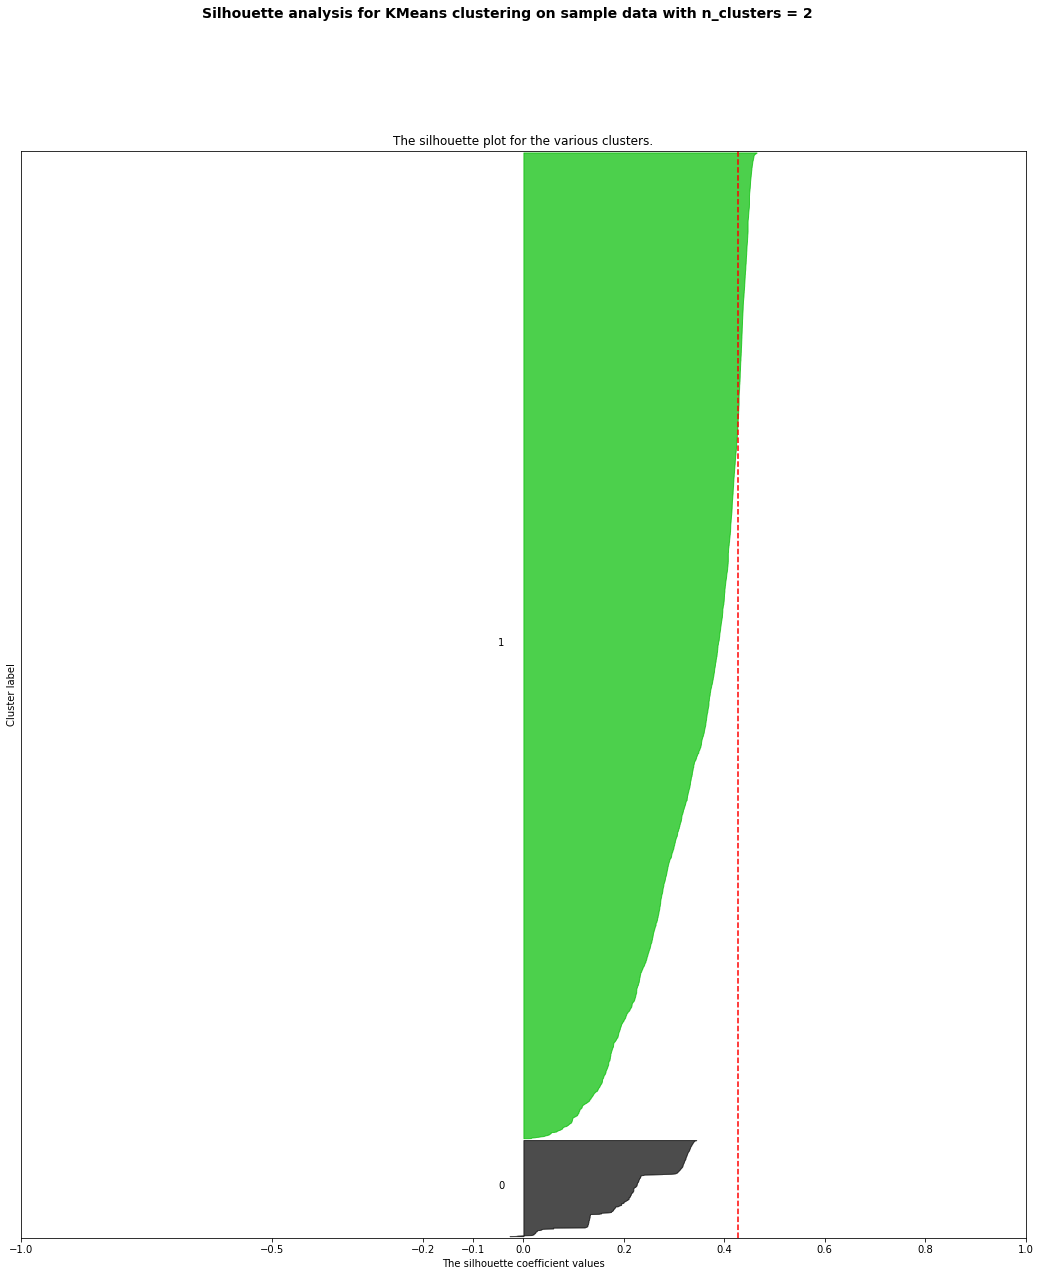

In [84]:
visualize(transformed_data, 2 10)

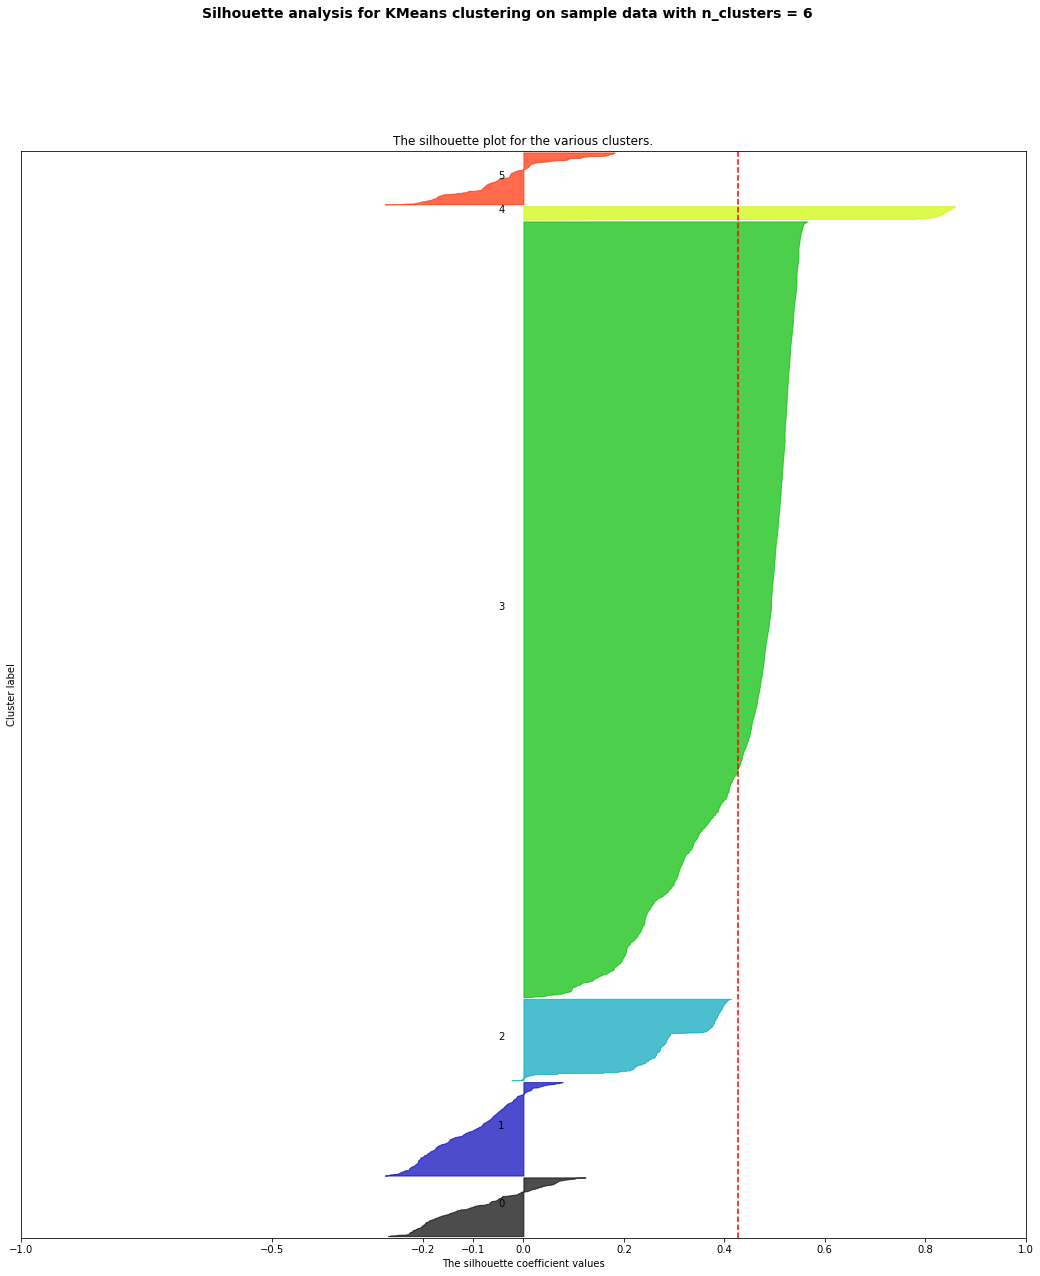

In [85]:
visualize(transformed_data, 6, 10)

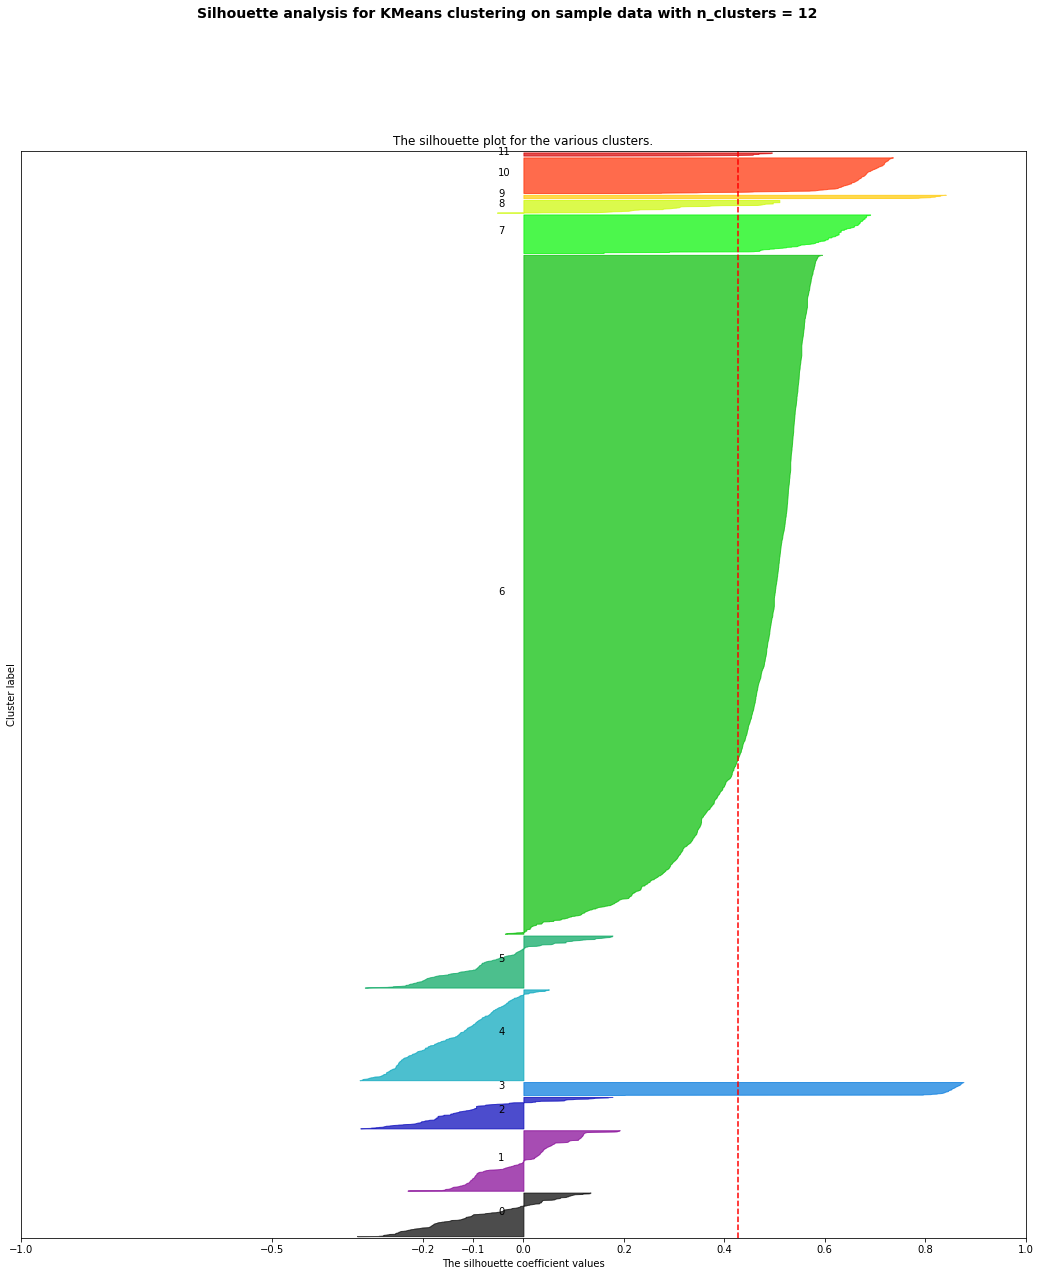

In [86]:
visualize(transformed_data, 12, 10)

## clusters are not very good as can seen by silhouettes, one reason can be due to the non determinism of k-means

# Different random states for KMEANS

In [53]:
def cluster(r_state):
    sil_scores =  []
    score_max = -2
    n_max = 1
    for n in range(2,20):
        clusterer = KMeans(n_clusters=n, random_state=r_state)
        cluster_labels = clusterer.fit_predict(transformed_data)
        silhouette_avg = silhouette_score(transformed_data, cluster_labels)
        if silhouette_avg > score_max:
            n_max = n
            score_max = silhouette_avg
    return n_max, score_max

In [54]:
max_score_list = []
max_n_list = []
start = time.time()
for r_state in range(50):
    num, score = cluster(r_state)
    end = time.time()
    print('Time Elapsed:{:f}, state:{:f}'.format(end - start,r_state))
    print('Max sil score: {:f}, num_clusters:{:f}'.format(score,num))
    max_score_list.append(score)
    max_n_list.append(num)

Time Elapsed:76.061369, state:0.000000
Max sil score: 0.342823, num_clusters:7.000000
Time Elapsed:153.392654, state:1.000000
Max sil score: 0.336435, num_clusters:3.000000
Time Elapsed:230.333875, state:2.000000
Max sil score: 0.337638, num_clusters:6.000000
Time Elapsed:306.934478, state:3.000000
Max sil score: 0.343509, num_clusters:7.000000
Time Elapsed:384.751026, state:4.000000
Max sil score: 0.356021, num_clusters:2.000000
Time Elapsed:460.571490, state:5.000000
Max sil score: 0.354166, num_clusters:6.000000


KeyboardInterrupt: 

## Clustering using pre selected variables

In [69]:
df_train.columns.get_loc('PCTETH')

154

In [65]:
df_train.columns.get_loc('PCTFRL')

156

In [70]:
df_train.columns.get_loc('% Total Population: White Alone')

34

In [71]:
df_train.columns.get_loc('% Families: Income in Below Poverty Level')

115

In [ ]:
var = ['PCTETH','PCTFRL','% Total Population: White Alone','% Families: Income in Below Poverty Level']

In [78]:
p_data = clean_data.T[[154,156,34,115]].T

In [80]:
sil_scores =  []
max_score = -2
max_n = 1
start = time.time()
for n in range(2,50):
    clusterer = KMeans(n_clusters=n, random_state=10)
    cluster_labels = clusterer.fit_predict(p_data)
    silhouette_avg = silhouette_score(p_data, cluster_labels)
    print("For n_clusters =", n, "The average silhouette_score is :", silhouette_avg)
    sil_scores.append(silhouette_avg)
    if silhouette_avg > max_score:
        max_n = n
        max_score = silhouette_avg
    end = time.time()
    print('Time Elapsed:{:f}, n:{:f}'.format(end - start, n))

For n_clusters = 2 The average silhouette_score is : 0.391182150494
Time Elapsed:4.250730, n:2.000000
For n_clusters = 3 The average silhouette_score is : 0.394446942227
Time Elapsed:8.337535, n:3.000000
For n_clusters = 4 The average silhouette_score is : 0.437444832374
Time Elapsed:12.183068, n:4.000000
For n_clusters = 5 The average silhouette_score is : 0.466907311139
Time Elapsed:16.087873, n:5.000000
For n_clusters = 6 The average silhouette_score is : 0.495793299622
Time Elapsed:19.563308, n:6.000000
For n_clusters = 7 The average silhouette_score is : 0.49986089285
Time Elapsed:23.298302, n:7.000000
For n_clusters = 8 The average silhouette_score is : 0.403000317418
Time Elapsed:26.681593, n:8.000000
For n_clusters = 9 The average silhouette_score is : 0.415038144573
Time Elapsed:29.996404, n:9.000000
For n_clusters = 10 The average silhouette_score is : 0.423540551665
Time Elapsed:33.104616, n:10.000000
For n_clusters = 11 The average silhouette_score is : 0.419555622487
Time 

KeyboardInterrupt: 

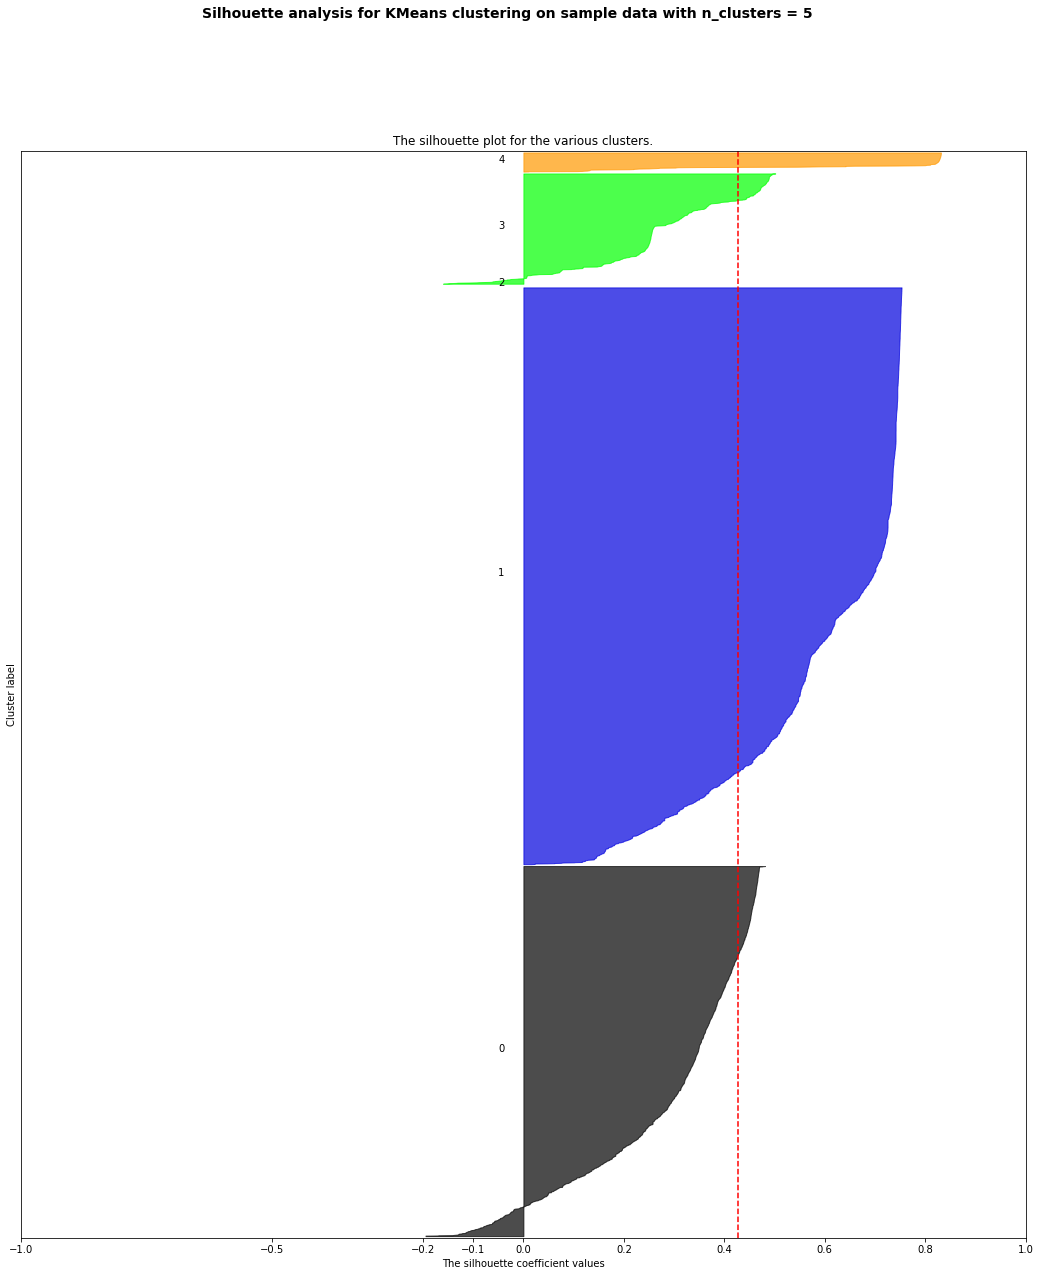

In [101]:
visualize(p_data, 5, 10)

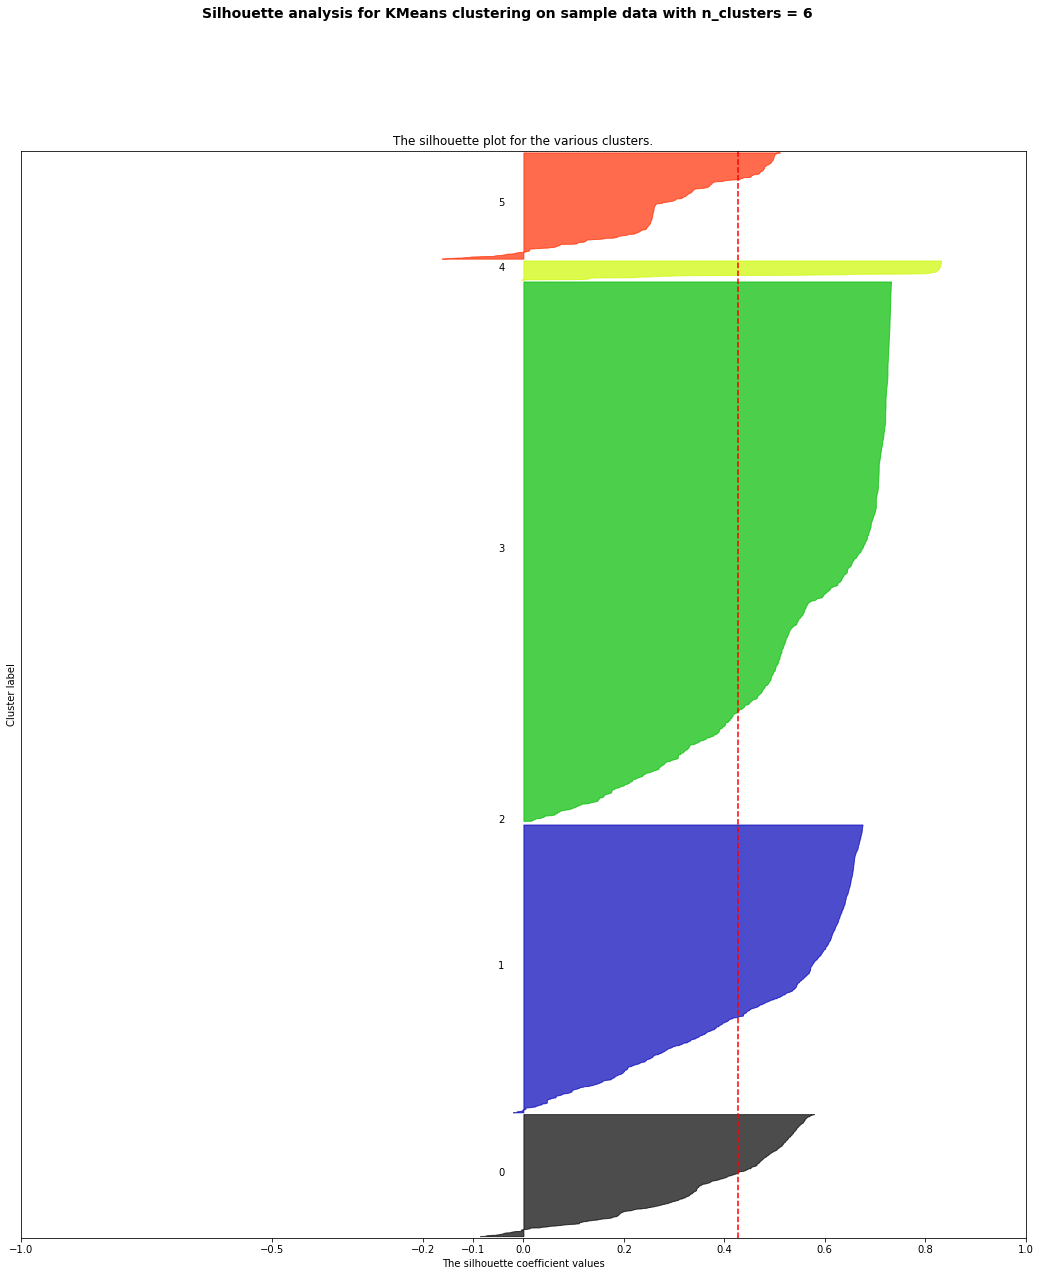

In [102]:
visualize(p_data, 6, 10)

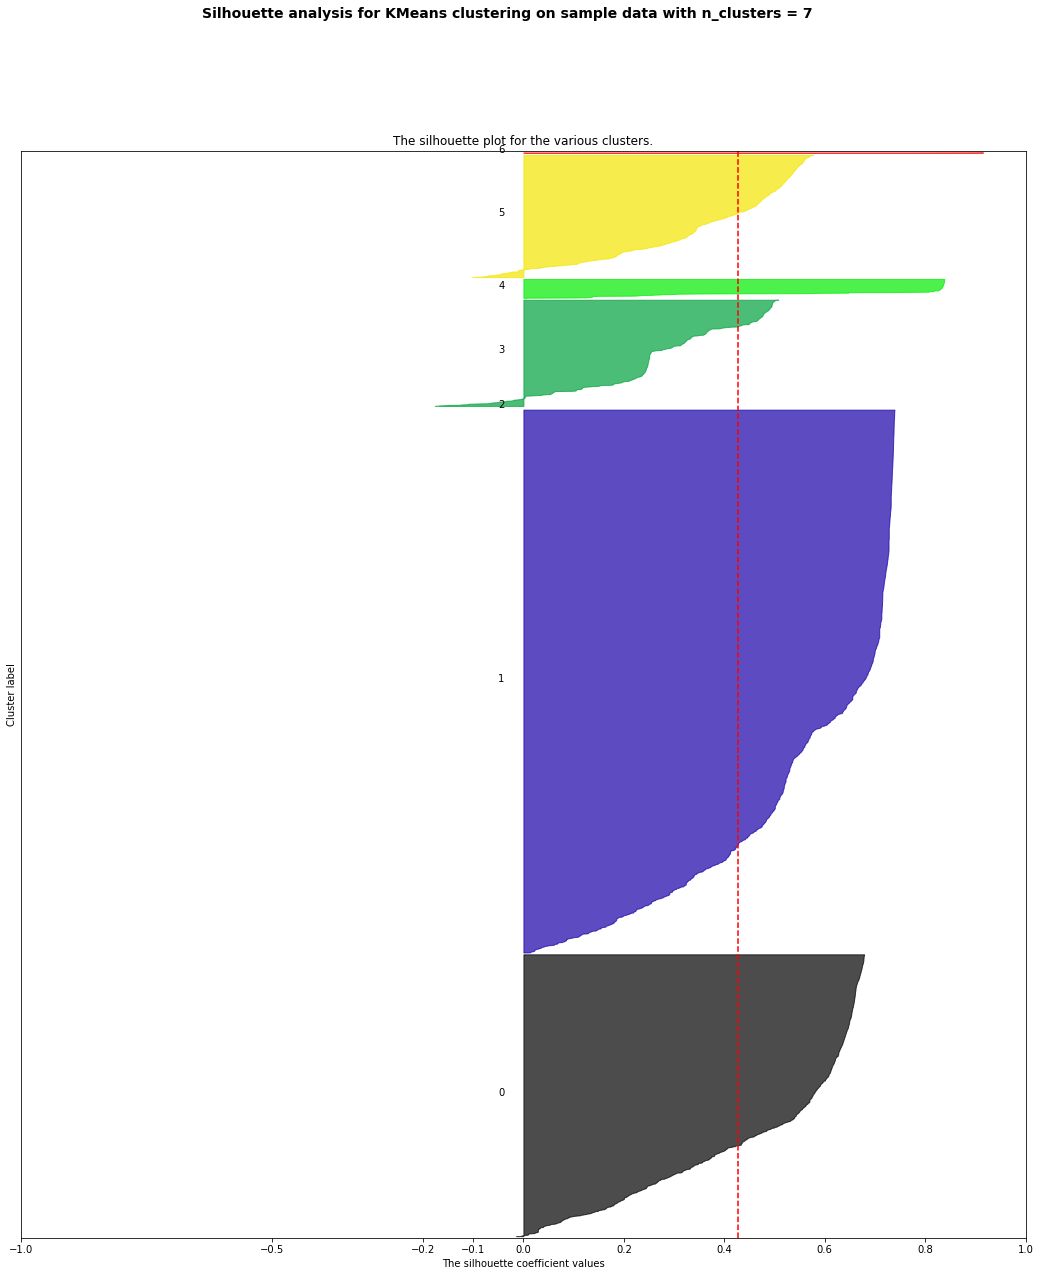

In [103]:
visualize(p_data, 7, 10)